# Sunshield Design Considerations

Should put calculations of Earth limb angle and balloon angular size here.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u, constants as c
u.ndim = u.dimensionless_unscaled
from matplotlib.patches import Rectangle, Circle, Polygon

In [2]:
def Line2pt(ax, xy0, xy1, color='black'):
    
    ax.plot([xy0[0], xy1[0]], [xy0[1], xy1[1]], color=color)
    
def Rot(xy, theta):
    
    ''' This is the kind of stuff I shouldn't be recreating '''
    
    x = xy[0]
    y = xy[1]
    
    c = np.cos(theta)
    s = np.sin(theta)
    
    return [(x*c + y*s).value, (-x*s + y*c).value]

In [3]:
def EarthLimbAngle(R, h):
    
    x = (R/(R+h)).to(u.ndim)
    
    return np.arccos(x).to(u.deg)

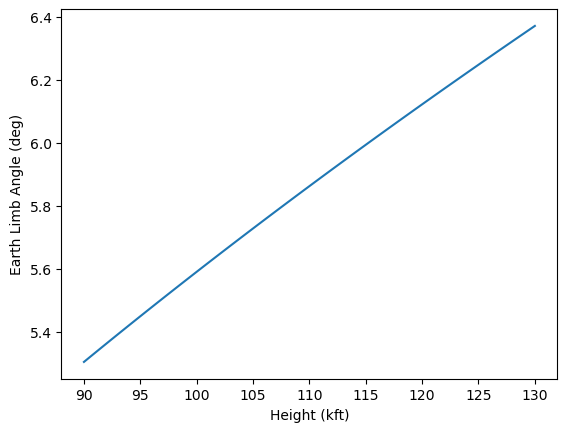

In [4]:
h = np.linspace(90e3, 130e3)*u.imperial.ft
plt.plot(h/1e3, EarthLimbAngle(c.R_earth, h))
plt.ylabel('Earth Limb Angle (deg)')
plt.xlabel('Height (kft)');

In [5]:
R_plot = 10
h_plot = 1
theta_plot = EarthLimbAngle(R_plot*u.m, h_plot*u.m)

We can quickly write down using the law of sines
\begin{align}
\frac{\sin(90^\circ)}{R + h} = \frac{\sin(90^\circ - \alpha)}{R}
\end{align}
which gives
\begin{align}
\cos(\alpha) = \frac{R}{R+h}
\end{align}

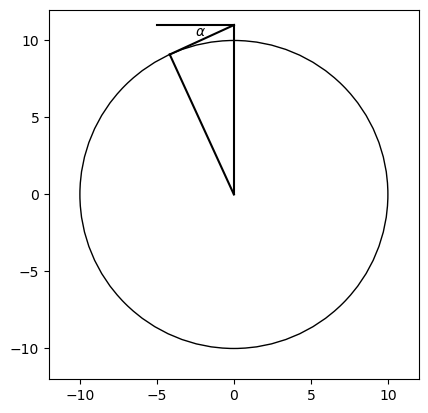

In [6]:
fig, ax = plt.subplots()
circle = Circle((0, 0), radius=R_plot, edgecolor='black', facecolor='none')
ax.add_patch(circle)
Line2pt(ax, [0,0], [0, R_plot+h_plot])
Line2pt(ax, [0,0], Rot([0,R_plot], -theta_plot))
Line2pt(ax, [0, R_plot+h_plot], Rot([0,R_plot], -theta_plot))
Line2pt(ax, [0, R_plot+h_plot], [-5, R_plot+h_plot])

ax.text(-2.5, R_plot+h_plot-0.7, r'$\alpha$')

ax.set_xlim(-12, 12)
ax.set_ylim(-12, 12)
ax.set_aspect('equal')
plt.show()

How long does the scoop need to be to block Earth limb?  Claim
\begin{align}
L = \frac{D}{\tan(\alpha + \theta)} + M
\end{align}
where 

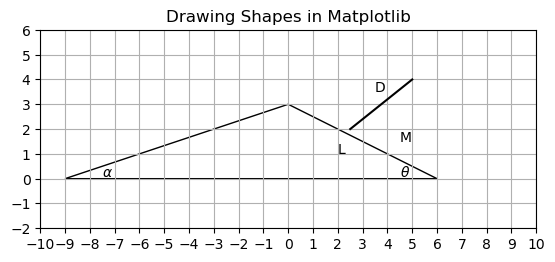

In [7]:
fig, ax = plt.subplots()

#rect = Rectangle((0.2, 0.2), width=0.5, height=0.3, edgecolor='blue', facecolor='lightblue')
#ax.add_patch(rect)

#circle = Circle((0.5, 0.5), radius=0.2, edgecolor='red', facecolor='none')
#ax.add_patch(circle)

polygon = Polygon([(-9, 0), (0, 3), (6, 0)], edgecolor='black', facecolor='none')
ax.add_patch(polygon)

Line2pt(ax, [2.5, 2], [5, 4])

ax.text(-7.5, 0.1, r'$\alpha$')
ax.text(4.5, 0.1, r'$\theta$')

ax.text(2, 1, 'L')
ax.text(4.5, 1.5, 'M')
ax.text(3.5, 3.5, 'D')

ax.set_xlim(-10, 10)
ax.set_ylim(-2, 6)
ax.set_aspect('equal')
ax.set_xticks(np.arange(-10, 11))
ax.set_yticks(np.arange(-2, 7))
plt.grid(True)
plt.title('Drawing Shapes in Matplotlib')
plt.show()

In [17]:
alpha = 5.5*u.deg
theta = 25*u.deg # minimum elevation
D = 2.2*u.m # bit conservative
M = 2.1*u.m # f/1

def scoop_length(D, M, alpha, theta):
    
    return D/np.tan(alpha + theta) + M

In [18]:
scoop_length(D, M, alpha, theta)

<Quantity 5.83485886 m>

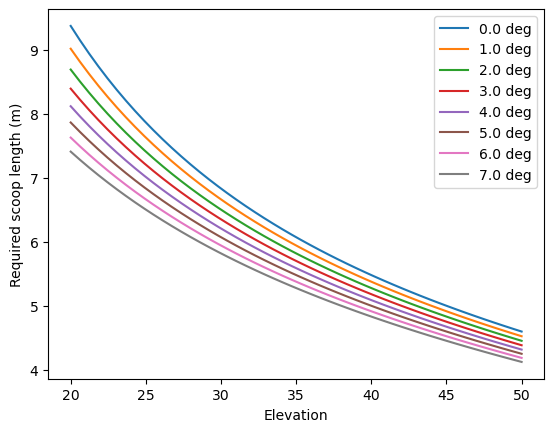

In [10]:
thetas = np.linspace(20, 50)*u.deg
alphas = np.arange(0,8)*u.deg
for alpha in alphas:
    plt.plot(thetas, scoop_length(D, M, alpha, thetas), label=alpha)
plt.ylabel('Required scoop length (m)')
plt.xlabel('Elevation')
plt.legend();

In [7]:
L = 5*u.mH
C = 100*u.pF
R = 10*u.kOhm
omega = (1/(np.sqrt(L*C))).to(u.kHz)
f = omega/(2*np.pi)
print(f)

225.07907903927654 kHz


In [6]:
(1/(omega*C)).to(u.ohm)

<Quantity 7071.06781187 Ohm>

In [8]:
(omega*L/R).to(u.dimensionless_unscaled)*1.5

<Quantity 1.06066017>